# 12. Visualizing and Understanding

Convolution Networks 내부에서는 무슨 일이?!

- 지금까지
  - CNN을 어떻게 학습시킬 것인가?
  - 다양한 문제를 풀기 위해 CNN architecture를 어떻게 설계+조합?

- 지금부터
  - CNN의 내부는 어떻게 생겼을까?
  - CNN의 중간 과정에서는 어떻게 이런 일이?
    - CNN이 입력 이미지에서 찾고 있는 것은??


## First / Second / Last Layer

### First Layer

단순 시각화만으로도 무엇을 찾고 있는지 알아낼 수 있음

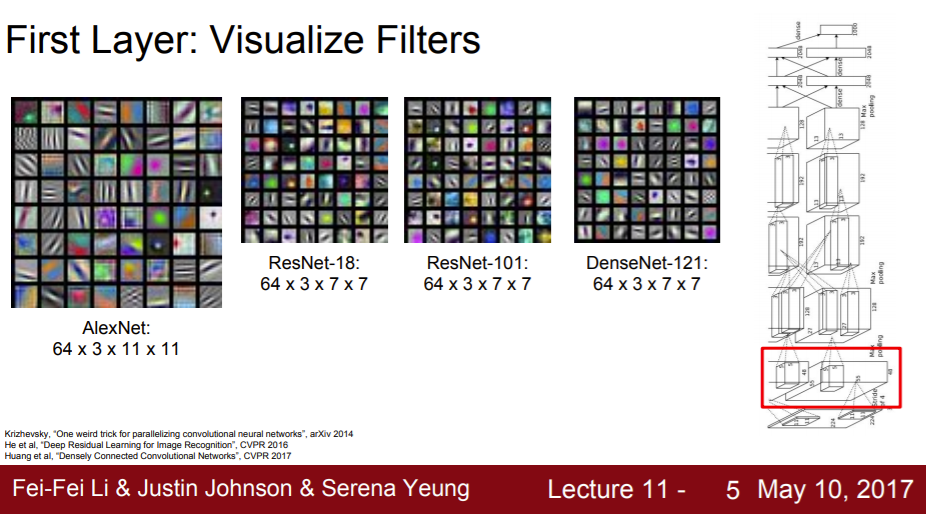

- AlexNet: Conv1에 많은 필터들
  - 각 Conv Filter: 11x11x3 형태 
    - 11x11x3 rgb image로 쉽게 시각화 가능
  - sliding window로 image 돎
  
- Net마다 다른 가중치 필터: 필터들이 무엇을 찾고 있는지 알 수 있음
  - 1. *Edge Feature*
  - 2. *Oppising Colors*
    - 다양한 각도와 위치

- 첫 번째 Layer에서 인간 시각 체계와 같이 Oriented Edges 감지

- CNN의 어떤 model, 어떤 data든 첫 번째 레이어는 모두 이런 식으로 생김
  - 일반적으로 첫 레이어는 Conv Layer

### Second Layer

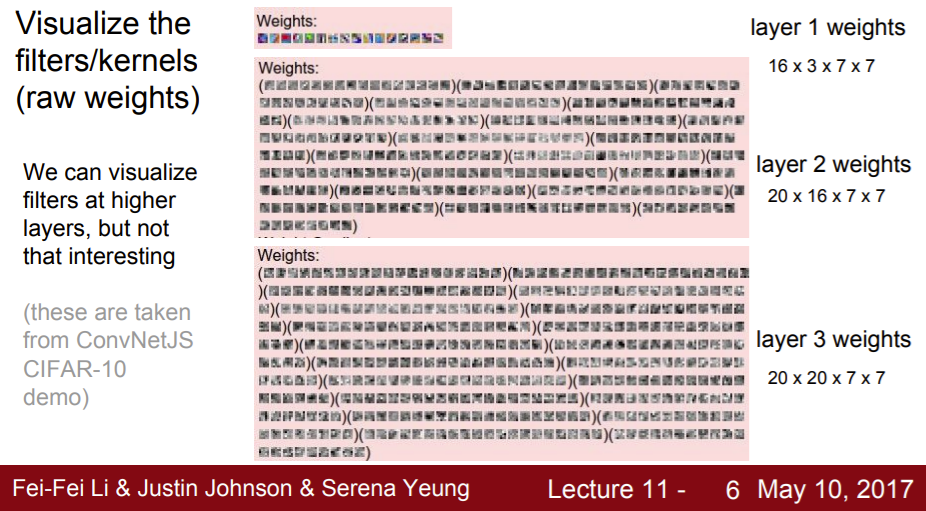

이 네트워크에서

- 첫 번째 레이어: 7x7 filter 16개

- Conv + ReLu 거치기

- 두 번째 Conv Layer
  - 16 channel의 입력을 받음
  - 20개의 7x7 conv filters
    - 직접적으로 이미지 형태 시각화 불가
    - input: 16 depth
  - 16x7x7 filter 시각화 → 16개의 grayscale image로 나누어서 표현해야 함
    - gray scale images: 두 번째 레이어의 각 필터들의 가중치
  - image와 filter들이 **직접 연결 X** → insight 얻기 힘듦
    - 첫 번째 layer의 output과 연결되어 있음
    - 시각화 내용: 두 번째 레이어의 결과를 maximum으로 만드는 첫 번째 layer의 output pattern은?
    

### Last Layer

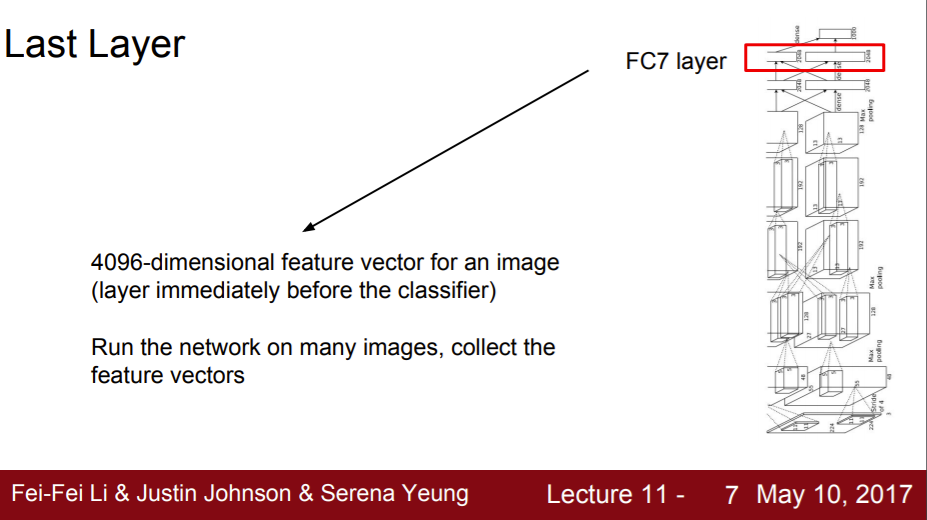

- 1000 Class Scores
  - train data의 predited scores 의미

- 마지막 레이어 **직전**: Fully Connected Layer
  - ex. AlexNet: 4096-dim vector → 최종 class scores

- Last Layer의 Visualization
  - 각 이미지에 CNN을 돌려 나온 4096 dim feature vector 모두 저장

#### 1. Nearest Neighbors 방법

거리가 가까운 이미지들을 시각화해 보기

- 픽셀 공간에서 계산 X CNN에서 나온 4096-dim feature vector 공간에서 계산 O

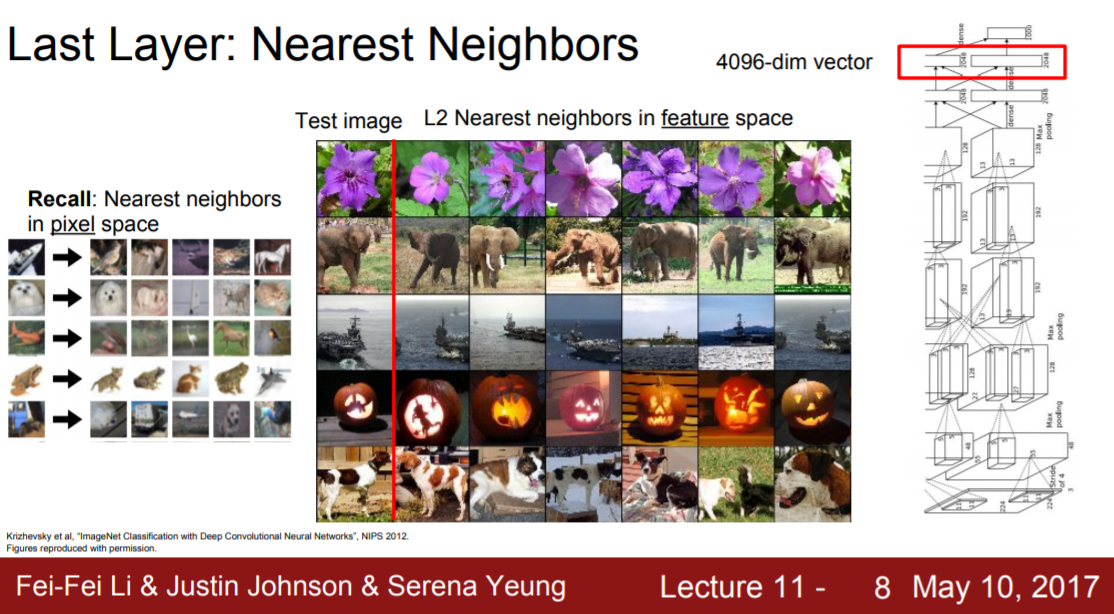

서로 픽셀 값의 차이는 커도 특징 공간에서는 유사한 특성을 가질 수 있음

semantic content한 특징들 잘 포착해 냄

#### 2. Dimensionality Reduction 방법

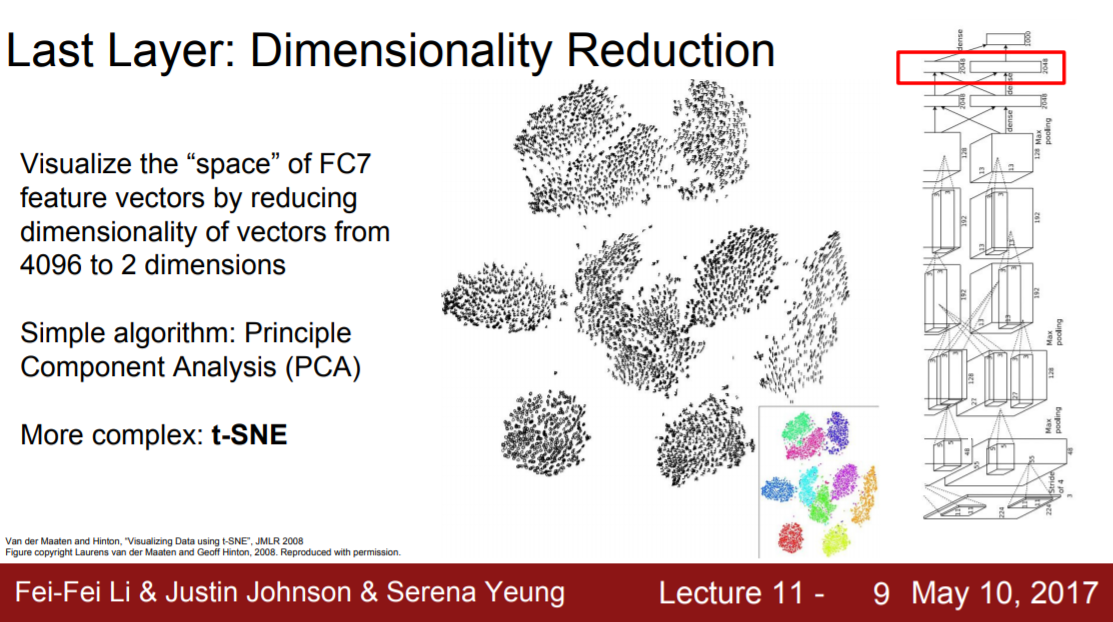

**특징 공간 시각화**

PCA: 고차원 특징 벡터 → 저차원 압축

특징 공간을 더 직접적으로 시각화 가능

- 그런데 **t-SNE**라는 알고리즘이 더 powerful 
  - t-distributed stochastic neighbor embedding
  - PCA보다 더 강력
  - 자연스럽게 **군집화**된 모습을 볼 수 있음
    - 각 군집이 각 숫자를 의미

- 많은 이미지들 네트워크에 통과 → 각 이미지에 대해 최종 단의 특징 벡터 기록 → 특징 벡터 다수 수집 → 특징 벡터에 t-SNE 적용 → 압축됨 → 시각화 → 어렴풋이 추측 가능

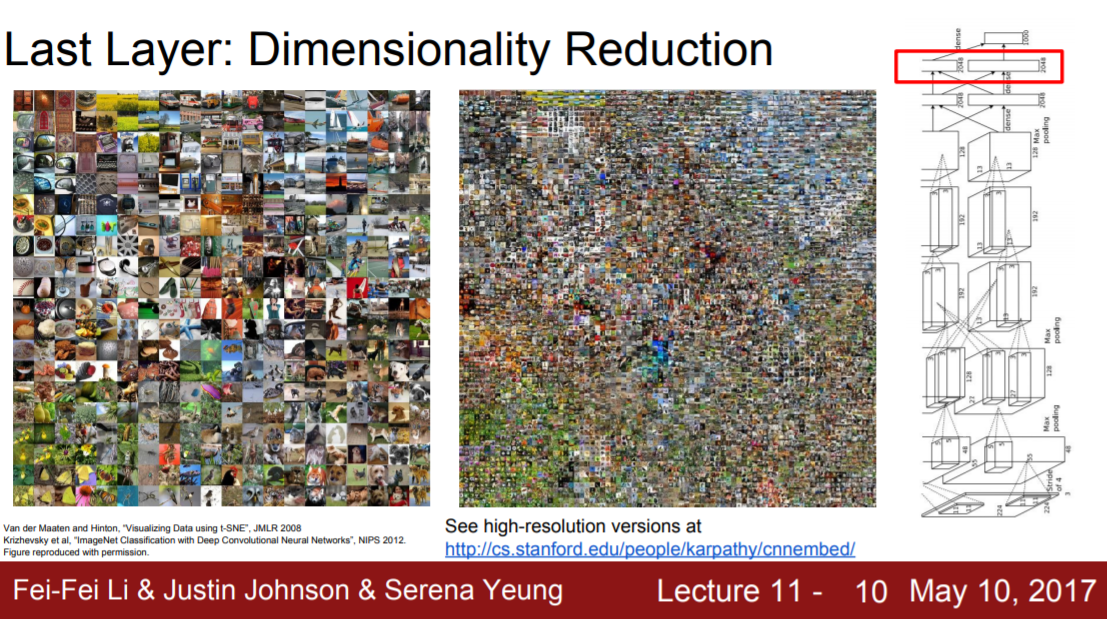

t-SNE → dimensioanlity reduction version의 feature space → semantic notion 짐작 가능

- 한 이미지가 갖는 정보
  - 1. original image (pixel)
  - 2. 4096-dim vector
    - output of fc-layer
  - 3. 2-dim vector
    - result of t-SNE to 4096-dim vector

원본 이미지 + CNN → 4096 dim
4096 dim + t-SNE → 2 dim

### Visualize Activation Map

중간 레이어에 있는 가중치를 시각화하여 일부 해석해 보기

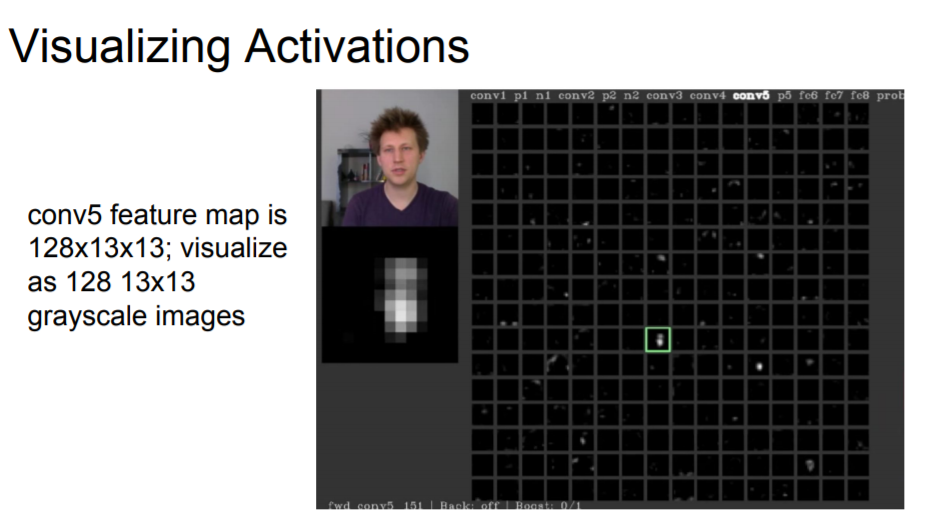

- AlexNet conv5: 128x13x13 dim tensor
  - 128개의 13x13 2-dim gird
  - 13x13(x1) feature map → gridscale image로 visaulization 가능
  

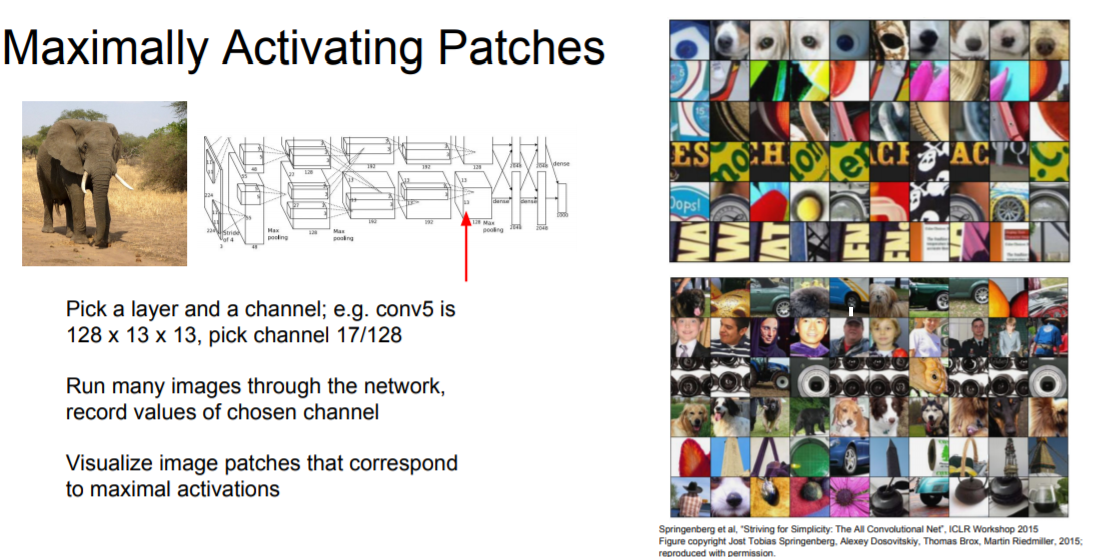

어떤 이미지가 17번째 feature map을 max로 activate 시키는지?

convolution layer neuron - receptive field small → 이미지의 일부만을 확인 → *특정 레이어의 특징을 최대화시키는 pathes를 시각화* → 활성화 정도를 기준으로 패치 정렬

- 각 행의 path들: from same one neuron
  - 각 patch: data set에서 나온 patch들을 정렬한 값
  - patch: 해당 뉴런의 활성 max로 만드는 patch 들
  - patch를 통해 **해당 neuron이 무엇을 찾고 있는지** 해석 가능

### Occlusion Experiments

from ECCV'14, Zeiler and Fergus

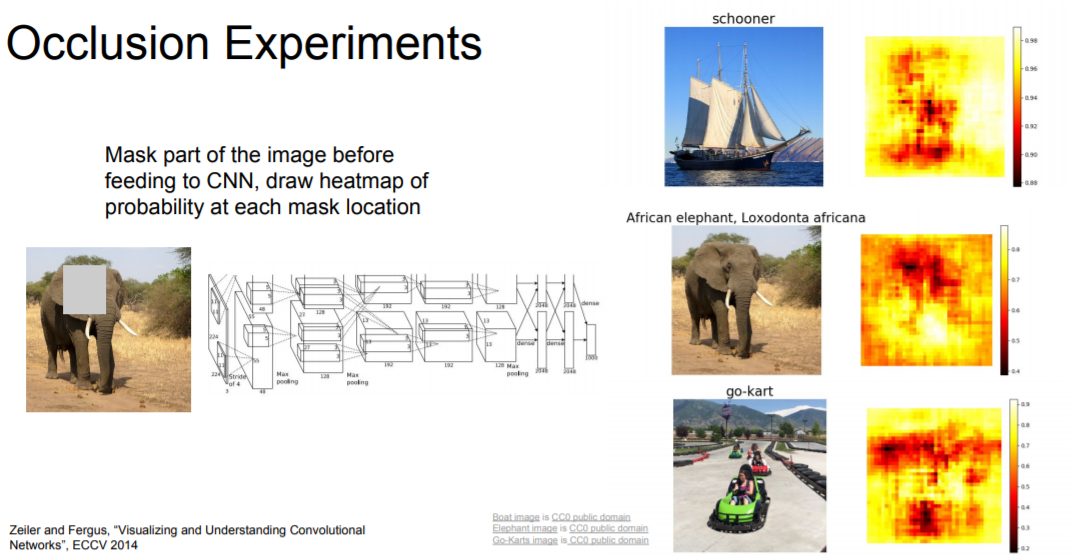

입력의 어떤 부분이 분류를 결정짓는 근거가 될까?

- 순서
  - input image → hide some point → 가린 부분을 평균 값으로 채움 → 네트워크에 통과 → 네트워크가 이 이미지 예측 확률 기록
  - 위 과정(occluded path)를 sliding하면서 전체 이미지에 적용시킴

- 아이디어
  - 일부 가림 → network score 변화 큼 → **분류를 결정짓는 데에 중요한 부분**

- Heatmap
  - 빨간색: 확률 값이 낮음
  - 노란색: 확률 값이 높음
  - go-kart 가렸을 때 확률 엄청 감소 → 그것이 아주 중요한 고려 사항이구나 알 수 있음